# DATA PREPROCESSING

In [2]:
import numpy as np
import pandas as pd

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#evaluating
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#stopwords
from nltk.corpus import stopwords

#stemmer
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#tokenizer
from nltk.tokenize import word_tokenize

#vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import re
import string

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
turnbackhoax = pd.read_csv('/content/drive/MyDrive/data/dataset_turnbackhoax_10k_cleaned.csv')

In [4]:
#read the data
turnbackhoax.head(5)

,index,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,hoax
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1,“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU A...,1
1,1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,0,“ini bener gasih?? Ya Allah gimna keadaan pa h...,1
2,2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,1,“Nenek lampir pemimpin partai banteng bercula ...,1
3,3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,0,“gerombolan kulup banyak menyusup ke ormas2 is...,1
4,4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,1,NaN,1


In [5]:
#check null values
turnbackhoax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10384 non-null  int64 
 1   Title      10383 non-null  object
 2   Timestamp  10384 non-null  object
 3   FullText   10382 non-null  object
 4   Tags       10384 non-null  object
 5   Author     10384 non-null  object
 6   Url        10384 non-null  object
 7   politik    10384 non-null  int64 
 8   Narasi     6513 non-null   object
 9   hoax       10384 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 811.4+ KB


In [6]:
#drop null values in title
turnbackhoax.dropna(subset=['Title'], inplace=True)
turnbackhoax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10383 entries, 0 to 10383
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10383 non-null  int64 
 1   Title      10383 non-null  object
 2   Timestamp  10383 non-null  object
 3   FullText   10381 non-null  object
 4   Tags       10383 non-null  object
 5   Author     10383 non-null  object
 6   Url        10383 non-null  object
 7   politik    10383 non-null  int64 
 8   Narasi     6512 non-null   object
 9   hoax       10383 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 892.3+ KB


In [7]:
turnbackhoax['hoax'].unique()
#semua data adalah hoax

array([1])

In [8]:
#remove [SALAH], etc in title
turnbackhoax['Title'] = turnbackhoax['Title'].apply(
    lambda x: re.findall(r'[)\]]\s(.+)', x) if (x[0] == '(') | (x[0] == '[') else x
)
turnbackhoax.info()
turnbackhoax['Title']


<class 'pandas.core.frame.DataFrame'>
Index: 10383 entries, 0 to 10383
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10383 non-null  int64 
 1   Title      10383 non-null  object
 2   Timestamp  10383 non-null  object
 3   FullText   10381 non-null  object
 4   Tags       10383 non-null  object
 5   Author     10383 non-null  object
 6   Url        10383 non-null  object
 7   politik    10383 non-null  int64 
 8   Narasi     6512 non-null   object
 9   hoax       10383 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 892.3+ KB


,Title
0,[Anies Baswedan Dekat Dengan Aliran Krsiten Se...
1,[Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...
2,[GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT]
3,[JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...
4,[PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...
...,...
10379,[Foto Raja Salman Mengangkat Tandu Jenazah Kor...
10380,"[Jokowi dituduh bodoh, salah cara dalam bersal..."
10381,[Jokowi dituduh memasukkan ribuan tenaga kerja...
10382,[Mata Uang Rupiah Terpuruk]


In [9]:
turnbackhoax['Narasi'] = turnbackhoax['Narasi'].fillna('')
turnbackhoax['Narasi']

,Narasi
0,“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU A...
1,“ini bener gasih?? Ya Allah gimna keadaan pa h...
2,“Nenek lampir pemimpin partai banteng bercula ...
3,“gerombolan kulup banyak menyusup ke ormas2 is...
4,
...,...
10379,Raja Salman dari arab saudi membawa orang-ora...
10380,"hehe, selalu bisa tersenyum melihat tingkah l..."
10381,Pak Jokowi itu menjadi walikota periode perta...
10382,"Hari ini, Rabu (23/09/2015), nilai tukar rupi..."


In [10]:
turnbackhoax['Title']

,Title
0,[Anies Baswedan Dekat Dengan Aliran Krsiten Se...
1,[Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...
2,[GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT]
3,[JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...
4,[PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...
...,...
10379,[Foto Raja Salman Mengangkat Tandu Jenazah Kor...
10380,"[Jokowi dituduh bodoh, salah cara dalam bersal..."
10381,[Jokowi dituduh memasukkan ribuan tenaga kerja...
10382,[Mata Uang Rupiah Terpuruk]


In [11]:
turnbackhoax['Narasi']

,Narasi
0,“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU A...
1,“ini bener gasih?? Ya Allah gimna keadaan pa h...
2,“Nenek lampir pemimpin partai banteng bercula ...
3,“gerombolan kulup banyak menyusup ke ormas2 is...
4,
...,...
10379,Raja Salman dari arab saudi membawa orang-ora...
10380,"hehe, selalu bisa tersenyum melihat tingkah l..."
10381,Pak Jokowi itu menjadi walikota periode perta...
10382,"Hari ini, Rabu (23/09/2015), nilai tukar rupi..."


In [12]:
turnbackhoax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10383 entries, 0 to 10383
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10383 non-null  int64 
 1   Title      10383 non-null  object
 2   Timestamp  10383 non-null  object
 3   FullText   10381 non-null  object
 4   Tags       10383 non-null  object
 5   Author     10383 non-null  object
 6   Url        10383 non-null  object
 7   politik    10383 non-null  int64 
 8   Narasi     10383 non-null  object
 9   hoax       10383 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 892.3+ KB


In [13]:
#alt1: gabungkan semua narasi dengan judul, yg ga ada narasi di-replace dengan judul
#alt2: yg ga ada narasi ga usah direplace

turnbackhoax_w_title = turnbackhoax.loc[:, ['Title', 'Narasi', 'hoax']]
turnbackhoax_wo_title = turnbackhoax.loc[:, ['Title', 'Narasi', 'hoax']]

turnbackhoax_w_title['Narasi'] = turnbackhoax.apply(
    lambda row: str(row["Title"]) + " " + str(row['Narasi']), axis=1
)

turnbackhoax_w_title=turnbackhoax_w_title.loc[:, ['Narasi', 'hoax']]

print(turnbackhoax_w_title.head(5))

turnbackhoax_wo_title['Narasi'] = turnbackhoax.apply(
    lambda row: str(row["Title"]) + " " + str(row['Narasi']) if row['Narasi'] != '' else row['Narasi'], axis=1
)

turnbackhoax_wo_title = turnbackhoax_wo_title.loc[:, ['Narasi', 'hoax']]
turnbackhoax_wo_title = turnbackhoax_wo_title[turnbackhoax_wo_title['Narasi'] != '']
print(turnbackhoax_wo_title.head(5))


                                              Narasi  hoax
0  ['Anies Baswedan Dekat Dengan Aliran Krsiten S...     1
1  ['Hakim Wahyu Iman Santoso Alami Kecelakaan Tu...     1
2  ['GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT'] “Nen...     1
3  ['JONATHAN LATUMAHINA SEORANG NASRANI DAN PENY...     1
4  ['PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUN...     1
                                              Narasi  hoax
0  ['Anies Baswedan Dekat Dengan Aliran Krsiten S...     1
1  ['Hakim Wahyu Iman Santoso Alami Kecelakaan Tu...     1
2  ['GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT'] “Nen...     1
3  ['JONATHAN LATUMAHINA SEORANG NASRANI DAN PENY...     1
5  ['PDI-P Diblacklist dari Peserta Pilpres, Tak ...     1


In [14]:
turnbackhoax_w_title.columns = ['news', 'is_fake']
turnbackhoax_wo_title.columns = ['news', 'is_fake']

In [15]:
turnbackhoax_w_title.head()
turnbackhoax_wo_title.head()

,news,is_fake
0,['Anies Baswedan Dekat Dengan Aliran Krsiten S...,1
1,['Hakim Wahyu Iman Santoso Alami Kecelakaan Tu...,1
2,['GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT'] “Nen...,1
3,['JONATHAN LATUMAHINA SEORANG NASRANI DAN PENY...,1
5,"['PDI-P Diblacklist dari Peserta Pilpres, Tak ...",1


In [16]:
campur1 = pd.read_csv('/content/drive/MyDrive/data/600 news with valid hoax label.csv', encoding='cp1252', sep=";")
campur2 = pd.read_csv('/content/drive/MyDrive/data/Data_latih.csv')

campur1['tagging'] = campur1['tagging'].map(lambda x: 0 if x =='Valid' else 1)
campur1.columns = ['news', 'is_fake']
campur2['narasi'] = campur2['judul'] + " " + campur2['narasi']
campur2 = campur2.loc[:,['narasi', 'label']]
campur2.columns = ['news', 'is_fake']

In [17]:
hoax_data_w_title = pd.concat([turnbackhoax_w_title, campur1[campur1['is_fake']==1], campur2[campur2['is_fake']==1]]).reset_index(drop=True)
hoax_data_wo_title = pd.concat([turnbackhoax_wo_title, campur1[campur1['is_fake']==1], campur2[campur2['is_fake']==1]]).reset_index(drop=True)

hoax_data_w_title.info()
hoax_data_wo_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14076 entries, 0 to 14075
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   news     14076 non-null  object
 1   is_fake  14076 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 220.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10205 entries, 0 to 10204
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   news     10205 non-null  object
 1   is_fake  10205 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 159.6+ KB


In [18]:
!pip install openpyxl
cnn_data = pd.read_excel('/content/drive/MyDrive/data/dataset_cnn_10k_cleaned.xlsx')
kompas_data = pd.read_excel('/content/drive/MyDrive/data/dataset_kompas_4k_cleaned.xlsx')
tempo_data = pd.read_excel('/content/drive/MyDrive/data/dataset_tempo_6k_cleaned.xlsx')
cnn_data.dropna(subset=['text_new'], inplace = True)
kompas_data.dropna(subset=['text_new'], inplace = True)
tempo_data.dropna(subset=['text_new'], inplace = True)

cnn_data.info()
kompas_data.info()
tempo_data.info()

cnn_data = cnn_data[['text_new', 'hoax']]
kompas_data = kompas_data[['text_new', 'hoax']]
tempo_data = tempo_data[['text_new', 'hoax']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9630 entries, 0 to 9629
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9630 non-null   int64 
 1   Title       9630 non-null   object
 2   Timestamp   9630 non-null   object
 3   FullText    9630 non-null   object
 4   Tags        9627 non-null   object
 5   Author      9630 non-null   object
 6   Url         9630 non-null   object
 7   text_new    9630 non-null   object
 8   hoax        9630 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 677.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 4749
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4723 non-null   int64 
 1   Title       4723 non-null   object
 2   Timestamp   4723 non-null   object
 3   FullText    4723 non-null   object
 4   Tags        4586 non-null   object
 5   Author      4413

In [19]:
cnn_data.columns = ['news', 'is_fake']
kompas_data.columns = ['news', 'is_fake']
tempo_data.columns = ['news', 'is_fake']

In [20]:
news_data = pd.concat([cnn_data, kompas_data, tempo_data, campur1[campur1['is_fake']==0], campur2[campur2['is_fake']==1]]).reset_index(drop=True)
news_data

,news,is_fake
0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0
1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,0
2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,0
3,Gede Pasek Doakan AHY Jadi Capres atau Cawapre...,0
4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,0
...,...,...
24777,: KPK Dilarang Membawa Brimob Bersenjata Masuk...,1
24778,Foto pejabat keuangan dibawah palu arit Jangan...,1
24779,Gambar Denny Siregar Musuh Warga Tasikmalaya d...,1
24780,Kaesang: Bapak Saya dengan Kesederhaan Bisa Ni...,1


In [21]:
#take 10k sample and 6k sample from news_data

news_data_14k = news_data.sample(n=14000, random_state = 17).reset_index(drop=True)
news_data_10k = news_data.sample(n=10000, random_state=17).reset_index(drop =True)
news_data_14k

,news,is_fake
0,"Foto Fatimah Aynur, Muslimah cantik Uyghur yan...",1
1,Istana Benarkan Paman Jokowi Miyono Meninggal ...,0
2,Bawaslu Tindak Lanjuti Dugaan Mahar Politik di...,0
3,Megawati Ingin Populerkan Salam Pancasila di I...,0
4,Panglima TNI Bantah Kabar OPM Sandera Pilot Su...,0
...,...,...
13995,"Selain Rian Ernest, Inilah Daftar Kader dan Po...",0
13996,INFOGRAFIK: Beda Tren Hoaks yang Muncul pada P...,0
13997,"Koalisi, Capres dan Cawapres PKB-Gerindra di T...",0
13998,PPP Desak Pemerintah Boikot DC Comics Imbas Su...,0


In [22]:
#satukan hoax dan news for 6k and 10k

data_20k = pd.concat([hoax_data_wo_title, news_data_10k]).reset_index(drop=True)
data_28k = pd.concat([hoax_data_w_title, news_data_14k]).reset_index(drop=True)

data_20k['tokens'] = data_20k['news'].apply(lambda row: len(row.split()))
data_28k['tokens'] = data_28k['news'].apply(lambda row: len(row.split()))

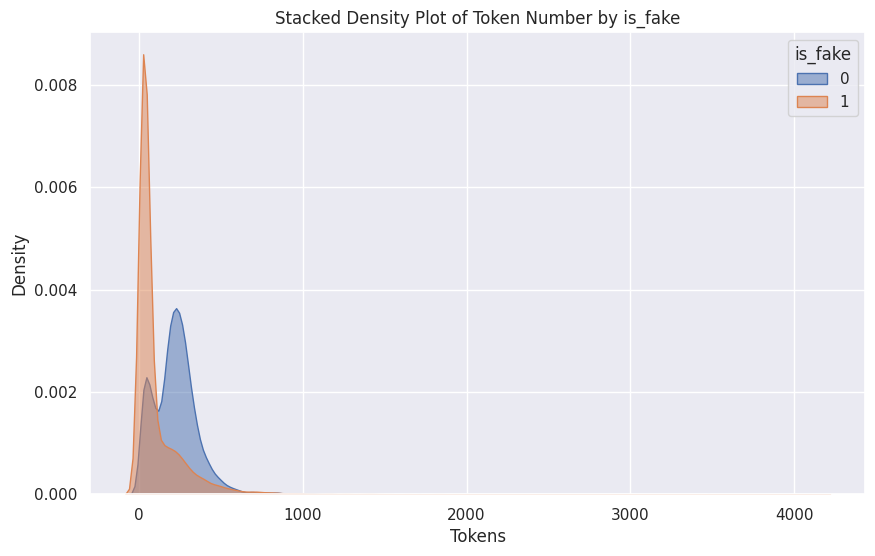

In [23]:
plt.figure(figsize=(10, 6))
for is_fake in [0,1]:
    subset = data_20k[data_20k['is_fake'] == is_fake]
    sns.kdeplot(subset['tokens'], fill=True, label=is_fake, alpha=0.5)

# Add labels and title
plt.xlabel('Tokens')
plt.ylabel('Density')
plt.title('Stacked Density Plot of Token Number by is_fake')

# Show legend and plot
plt.legend(title='is_fake')
plt.show()

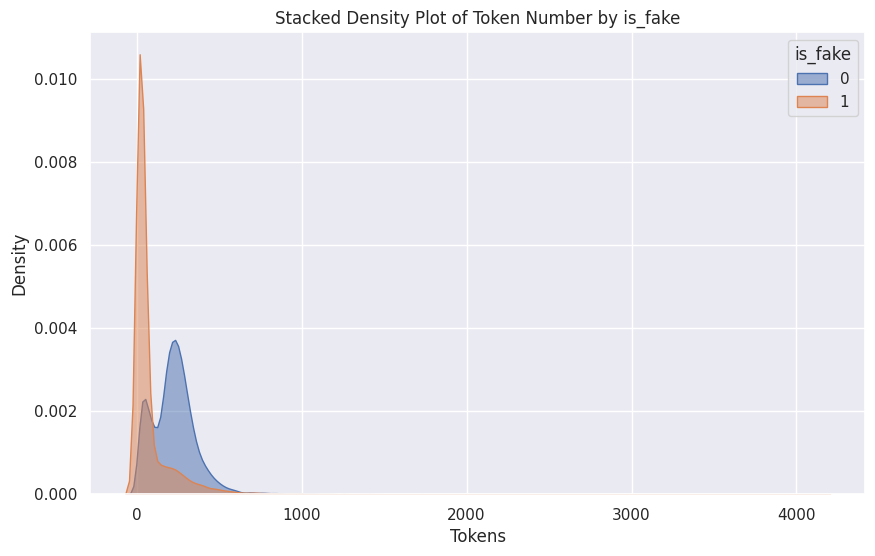

In [24]:
plt.figure(figsize=(10, 6))
for is_fake in [0,1]:
    subset = data_28k[data_28k['is_fake'] == is_fake]
    sns.kdeplot(subset['tokens'], fill=True, label=is_fake, alpha=0.5)

# Add labels and title
plt.xlabel('Tokens')
plt.ylabel('Density')
plt.title('Stacked Density Plot of Token Number by is_fake')

# Show legend and plot
plt.legend(title='is_fake')
plt.show()

In [25]:
def clean(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'\b\d+\b', '<NUMBER>', text)
    return text

def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(text):
    stop_words =  set(stopwords.words('indonesian'))
    word_tokens_no_stopwords = [w for w in text if not w in stop_words]
    return word_tokens_no_stopwords

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem(text):
    stemmed_text = stemmer.stem(text)
    return stemmed_text

In [26]:
!pip install indoNLP
import indoNLP.preprocessing

#1. turn all to lowercase, only get alphabetical and numerical character
#2. for numerical character, replace with <NUMBER>
#3. remove URL
#4. remove HTML
#5. replace slang
#6. replace word elongation
#7. remove stop words
#8. stem words
#9. tokenize words

# clean_data_20k = data_20k.copy()
# clean_data_20k['news'] = clean_data_20k['news'].apply(clean)
# clean_data_20k['news'] = clean_data_20k['news'].apply(lambda row: indoNLP.preprocessing.remove_html(row))
# clean_data_20k['news'] = clean_data_20k['news'].apply(lambda row: indoNLP.preprocessing.remove_url(row))
# clean_data_20k['news'] = clean_data_20k['news'].apply(lambda row: indoNLP.preprocessing.replace_slang(row))
# clean_data_20k.to_csv('/content/drive/My Drive/data/slang_replaced_20k.csv', index=False)
# clean_data_20k['news'] = clean_data_20k['news'].apply(lambda row: indoNLP.preprocessing.replace_word_elongation(row))
# clean_data_20k.to_csv('/content/drive/My Drive/data/elongated_word_20k.csv', index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.6 MB/s eta 0:00:00


In [27]:
# clean_data_20k['news'] = clean_data_20k['news'].apply(lambda row: indoNLP.preprocessing.remove_stopwords(row))
# clean_data_20k.to_csv('/content/drive/My Drive/data/removed_stopwords_20k.csv', index=False)
#some say that removing stop words is not necessary in sentiment/style classification

In [28]:
# clean_data_20k = pd.read_csv('/content/drive/My Drive/data/removed_stopwords_20k.csv')
# clean_data_20k['news'] = clean_data_20k['news'].apply(stem)
# clean_data_20k.to_csv('/content/drive/My Drive/data/stemmed_data_20k.csv', index=False)
#try no stemming

In [29]:
elongated = pd.read_csv("/content/drive/My Drive/data/elongated_word_20k.csv")

In [30]:
elongated['news'][20204]

'kasus iphone bengkok atau melengkung sebelumnya sempat menimpa beberapa model iphone  terakhir  kasus ini menimpa iphone 5s pada awal tahun ini  bagaimana dengan duo iphone terbaru yang baru dilepas ke pasaran apple pada jumat minggu lalu  belum genap seminggu  kasus serupa ternyata sudah dilaporkan pengguna iphone   tak hanya satu kasus  tiga iphone  dalam keadaan melengkung sudah tersebar di internet  seperti dikutip dari mashable  rabu       seorang anggota forum macrumors membagikan foto iphone  plus miliknya yang melengkung  hanzon  nama anggota itu  mengaku menyimpan iphone  plus di saku celana bagian depan saat menyetir  setelah beberapa jam dikantongi  hanzon mendapati iphone  tersebut sudah berubah bentuk  bagian tengahnya sedikit melengkung  kasus serupa juga dilaporkan anggota forum macrumors  devinpitcher  ia menceritakan  iphone  plus milik rekannya juga melengkung setelah dikantongi di saku depan celana  sebuah foto iphone  melengkung ikut di posting oleh devin dalam seb

# TRAINING MODELS

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

X, y = elongated.news, elongated.is_fake

pipe = Pipeline(
    [
        ("vectorizer", TfidfVectorizer()),
        ("classifier", SVC(probability=True, random_state=17)),
    ],
    verbose=True,
)

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, random_state=17, shuffle=True)

scoring = "accuracy"

scores = cross_val_score(pipe, X, y, scoring=scoring, cv=cv)
print(f"{scoring}: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   4.0s


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# data = pd.read_csv('drive/MyDrive/data/train_data.csv')

# data['news'] = data['news'].astype(str)
X = elongated["news"]
y = elongated["is_fake"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y
)

maxlen = 1000
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
pred=model.predict(X_test_pad)
y_pred=np.argmax(pred,axis=1)

cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print(classification_report(y_test, y_pred))
sns.heatmap(cfm, fmt='.0f', annot=True)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import GlobalMaxPooling1D
from sklearn.model_selection import train_test_split

data = pd.read_csv('drive/MyDrive/data/train_data.csv')

data['news'] = data['news'].astype(str)
X = data["news"]
y = data["is_fake"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y
)

maxlen = 1000
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(128, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model = Sequential(name = 'lstm_nn_model')
# model.add(layer = Embedding(input_dim = maxlen, output_dim = 120, name = '1st_layer'))
# model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
# model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
# model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
# model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
# model.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Confusion matrix
pred=model.predict(X_test_pad)
y_pred=np.argmax(pred,axis=1)

cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print(classification_report(y_test, y_pred))
sns.heatmap(cfm, fmt='.0f', annot=True)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('drive/MyDrive/data/train_data.csv')

data['news'] = data['news'].astype(str)
X = data["news"]
y = data["is_fake"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y
)

maxlen = 1000
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

# model = Sequential()
# model.add(Embedding(input_dim=10000, output_dim=128))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model = Sequential(name = 'lstm_nn_model')
model.add(layer = Embedding(input_dim = 10000, output_dim = 120, name = '1st_layer'))
model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
model.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
pred=model.predict(X_test_pad)
y_pred=np.argmax(pred,axis=1)

cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print(classification_report(y_test, y_pred))
sns.heatmap(cfm, fmt='.0f', annot=True)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

# Load data
data = pd.read_csv('drive/MyDrive/data/train_data.csv')

# Ensure the 'news' column is treated as text
data['news'] = data['news'].astype(str)

# Split features and target
X = data["news"]
y = data["is_fake"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y
)

# Tokenize and pad sequences
maxlen = 1000
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

# Model setup
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=1, batch_size=64, validation_data=(X_test_pad, y_test))

print(history)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict probabilities
y_pred_prob = model.predict(X_test_pad)

# Convert probabilities to binary labels (0 or 1) with a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion matrix
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cfm, fmt='.0f', annot=True)


Logictic Regression


---



Confusion Matrix with custom cutoff:
[[1692   27]
 [  90 2232]]

Classification Report with custom cutoff:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1719
           1       0.99      0.96      0.97      2322

    accuracy                           0.97      4041
   macro avg       0.97      0.97      0.97      4041
weighted avg       0.97      0.97      0.97      4041



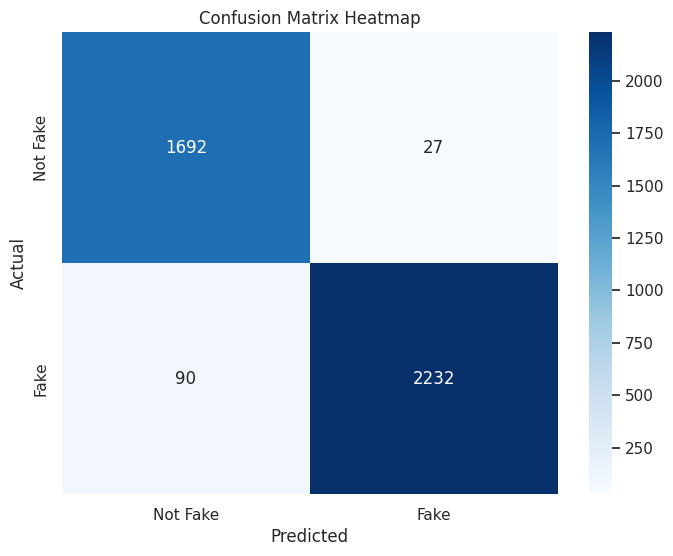

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# data = pd.read_csv('drive/MyDrive/data/train_data.csv')
# data['news'] = data['news'].astype(str)
X = elongated['news']
y = elongated['is_fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model_logistic = LogisticRegression()
model_logistic.fit(X_train_vectorized, y_train)

# y_pred = model.predict(X_test)


# cfm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cfm)

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# Step 2: Get predicted probabilities for the positive class (class 1)
y_probs = model_logistic.predict_proba(X_test_vectorized)[:, 1]  # Probabilities for class 1

# Step 3: Set a custom cutoff
custom_cutoff = 0.9  # Change the threshold as needed

# Step 4: Make predictions based on the custom cutoff
y_pred_custom = (y_probs >= custom_cutoff).astype(int)

# Step 5: Evaluate the model's performance with the custom cutoff
print("Confusion Matrix with custom cutoff:")
print(confusion_matrix(y_test, y_pred_custom))

cfm = confusion_matrix(y_test, y_pred_custom)

print("\nClassification Report with custom cutoff:")
print(classification_report(y_test, y_pred_custom))

plt.figure(figsize=(8, 6))
sns.heatmap(cfm, fmt='.0f', annot=True, cmap='Blues',
            xticklabels=['Not Fake', 'Fake'],
            yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [14]:
test_ = model_logistic.predict_proba(X_test_vectorized)
np.sum(test_, axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [24]:
y_test

,is_fake
4491,1
13359,0
6083,1
19182,0
7785,1
...,...
12095,1
7764,1
10657,0
16224,0


In [27]:
y_probs

array([9.99679765e-01, 8.23950498e-01, 9.70026745e-01, ...,
       9.32193529e-29, 7.12663569e-02, 9.95262491e-01])

In [6]:
test_vector = vectorizer.transform(["Merokok Dapat Menjadikan Luka Operasi pada Khitan Lebih Cepat Kering"])
test_probs = model_logistic.predict_proba(test_vector)
test_predict = (test_probs >= custom_cutoff)
test_predict

In [17]:
test_vector = vectorizer.transform(["Korps Garda Revolusi Islam Iran (IRGC) mengumumkan bahwa jenazah wakil komandan pasukan elit, Brigadir Jenderal Abbas Nilforoushan, telah ditemukan di Beirut, Lebanon. Nilforoushan tewas dalam serangan Israel di Beirut, Lebanon, pada 27 September lalu yang juga menewaskan pemimpin Hizbullah, Hassan Nasrallah."])
test_probs = model_logistic.predict_proba(test_vector)
test_predict = (test_probs >= custom_cutoff)
test_probs

array([[0.12671052, 0.87328948]])

array([[False, False]])

In [15]:
test_vector = vectorizer.transform(["Terdapat tujuh pemain Timnas Indonesia yang sejauh ini terkena kartu kuning di putaran ketiga Kualifikasi Piala Dunia 2026 zona Asia. Situasi ini jadi alarm agar tak terkena akumulasi kartu. Sebab jika satu pemain mendapat kartu kuning dalam dua laga berbeda, maka yang bersangkutan dilarang bermain pada pertandingan berikutnya."])
test_probs = model_logistic.predict_proba(test_vector)
test_predict = (test_probs >= custom_cutoff)
test_predict

array([[False,  True]])

In [16]:
test_probs

array([[0.01547172, 0.98452828]])

array([[False,  True]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Step 1: Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_vectorized.toarray())
X_test_pca = pca.transform(X_test_vectorized.toarray())

# Step 2: Train a logistic regression model on the reduced data
model_logistic_pca = LogisticRegression()
model_logistic_pca.fit(X_train_pca, y_train)

# Step 3: Create a mesh grid for the plot
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Step 4: Predict the decision boundary for each point on the grid
Z = model_logistic_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('Logistic Regression Decision Boundary (with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


Decision Tree

---


Confusion Matrix:
[[1609  110]
 [  79 2243]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1719
           1       0.95      0.97      0.96      2322

    accuracy                           0.95      4041
   macro avg       0.95      0.95      0.95      4041
weighted avg       0.95      0.95      0.95      4041



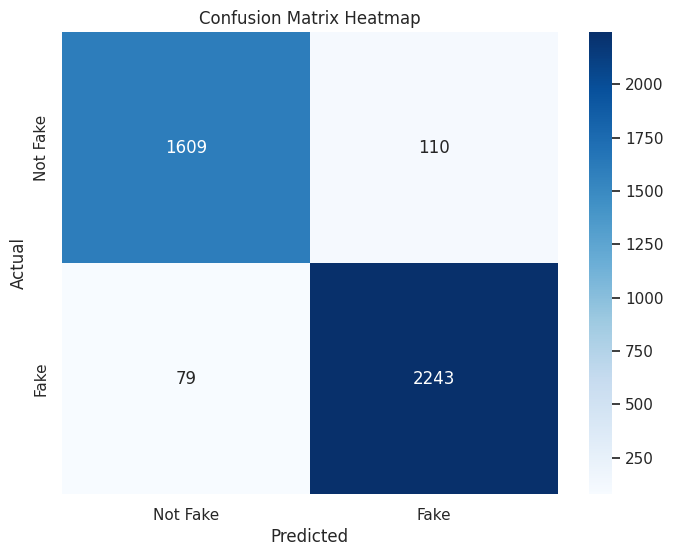

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# data = pd.read_csv('drive/MyDrive/data/train_data.csv')
# data['news'] = data['news'].astype(str)
X = elongated['news']
y = elongated['is_fake']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cfm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cfm, fmt='.0f', annot=True, cmap='Blues',
            xticklabels=['Not Fake', 'Fake'],
            yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Random Forest


---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('drive/MyDrive/data/train_data.csv')
data['news'] = data['news'].astype(str)
X = data['news']
y = data['is_fake']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cfm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cfm, fmt='.0f', annot=True, cmap='Blues',
            xticklabels=['Not Fake', 'Fake'],
            yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Gradient Boosting


---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('drive/MyDrive/data/train_data.csv')
data['news'] = data['news'].astype(str)
X = data['news']
y = data['is_fake']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cfm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cfm, fmt='.0f', annot=True, cmap='Blues',
            xticklabels=['Not Fake', 'Fake'],
            yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Passive Aggressive Classifier


---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('drive/MyDrive/data/train_data.csv')
data['news'] = data['news'].astype(str)
X = data['news']
y = data['is_fake']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cfm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cfm, fmt='.0f', annot=True, cmap='Blues',
            xticklabels=['Not Fake', 'Fake'],
            yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

XGBoost


---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('drive/MyDrive/data/train_data.csv')
data['news'] = data['news'].astype(str)
X = data['news']
y = data['is_fake']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cfm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cfm, fmt='.0f', annot=True, cmap='Blues',
            xticklabels=['Not Fake', 'Fake'],
            yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()